<a href="https://colab.research.google.com/github/porkens/myTestRepo/blob/main/Uczenie_Maszynowe_Projekt_Roulette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym import spaces
from gym.utils import seeding
%matplotlib inline
plt.figure(figsize=(4, 3))

<Figure size 288x216 with 0 Axes>

<Figure size 288x216 with 0 Axes>

---Proste wyjaśnienie---     
Agent gra w ruletkę od 0 do 36 w zmodyfikowanym otoczeniu kasyna. Dla każdego spinu agent stawia na numer. Agent otrzymuje pozytywną nagrodę, jeśli wyrzucona liczba nie jest zerem, a jej parytet jest zgodny z zakładem agenta. Dodatkowo agent może odejść od stołu kończąc grę.

    ---Szczegółowe wyjaśnienie---
    Koło ruletki ma 37 miejsc. Jeśli zakład wynosi 0 i wypadnie 0,
    wygrywasz nagrodę w wysokości 35. Jeśli parytet Twojego zakładu odpowiada parytetowi
    w obrocie wygrywasz 1. W przeciwnym razie otrzymasz nagrodę w wysokości -1.
    Długoterminowa nagroda za grę 0 powinna wynosić -1/37 dla dowolnego stanu
    Ostatnia akcja (38) zatrzymuje rollout na powrót 0 (odchodzenie od stołu)
    

Dodatkowo agent powinnien nauczyć się, że najlepszym długoterminowym posunięciem nie jest wcale granie, ale odejście od stołu.

In [ ]:
env= gym.make('Roulette-v0').env
env.reset()

0

In [ ]:
env.action_space

Discrete(38)

In [ ]:
env.observation_space

Discrete(1)

In [ ]:
env.step(2)

(0, 1.0, False, {})

In [ ]:
n_states = env.observation_space.n
n_actions = env.action_space.n

In [ ]:
def initialize_policy(n_states, n_actions):
  
    policy = np.zeros(shape=(n_states, n_actions)) +  1/n_actions
    
    return policy

policy = initialize_policy(n_states, n_actions)

In [ ]:
def generate_session(env, policy, t_max = 5000):
  
  observations, actions = [], []
  total_reward = 0.
  observation = env.reset()
  
  for t in range(t_max):
    
    action = np.random.choice(n_actions, p = policy[observation])

    new_observation, reward, done, info = env.step(action)

    observations.append(observation)
    actions.append(action)
    total_reward += reward

    observation = new_observation
    if done:
        break

  return observations, actions, total_reward

In [ ]:
def select_elites(observations_batch, actions_batch, total_reward_batch, percentile):

    reward_threshold = np.percentile(total_reward_batch, percentile)

    elite_observations = []
    elite_actions = []

    for i in range(len(total_reward_batch)):
      if total_reward_batch[i] >= reward_threshold:
        elite_observations += (observations_batch[i])
        elite_actions += (actions_batch[i])
        
    return elite_observations, elite_actions

In [ ]:
def update_policy(elite_observations, elite_actions):

    policy_updated = policy

    elite_observations_unique = set(elite_observations)
    
    actions_count = {observation:[0] * n_actions for observation in elite_observations_unique}

    for observation, action in zip(elite_observations, elite_actions):
        actions_count[observation][action] += 1
        
     
        
    for observation in elite_observations_unique:
        policy_updated[observation] = np.array(actions_count[observation]) / np.sum(actions_count[observation])

    return policy_updated

In [ ]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, percentile):

    mean_reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append([mean_reward, threshold])
    
    plt.figure(figsize=[8, 4])
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.plot(list(zip(*log))[1], label='Reward thresholds')
    plt.legend()
    plt.grid()

    clear_output(True)
    print("mean reward = ", mean_reward)
    print("treshold = ", threshold)
    plt.show()

In [ ]:
policy = initialize_policy(n_states, n_actions)

mean reward =  0.0
treshold =  0.0


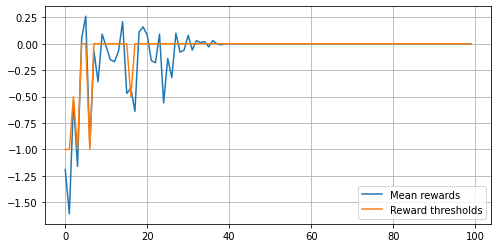

In [ ]:
n_sessions = 100
percentile = 50
learning_rate = 0.5

log = []

for i in range(100):
  
    sessions = [generate_session(env, policy, t_max=5000) for j in range(n_sessions)]
    
    observations_batch, actions_batch, total_reward_batch = zip(*sessions)

    elite_observations, elite_actions = select_elites(observations_batch, actions_batch, total_reward_batch, percentile)

    policy_updated = update_policy(elite_observations, elite_actions)

    policy = learning_rate * policy_updated + (1 - learning_rate) * policy

    show_progress(total_reward_batch, log, percentile)

In [ ]:
total_reward = 0.

observation = env.reset()



for t in range(100):



  action = np.random.choice(n_actions, p = policy[observation])

  

  new_observation, reward, done, info = env.step(action)



  observation = new_observation



  total_reward += reward



  print(t, total_reward, done, action)

0 0.0 True 37
1 0.0 True 37
2 0.0 True 37
3 0.0 True 37
4 0.0 True 37
5 0.0 True 37
6 0.0 True 37
7 0.0 True 37
8 0.0 True 37
9 0.0 True 37
10 0.0 True 37
11 0.0 True 37
12 0.0 True 37
13 0.0 True 37
14 0.0 True 37
15 0.0 True 37
16 0.0 True 37
17 0.0 True 37
18 0.0 True 37
19 0.0 True 37
20 0.0 True 37
21 0.0 True 37
22 0.0 True 37
23 0.0 True 37
24 0.0 True 37
25 0.0 True 37
26 0.0 True 37
27 0.0 True 37
28 0.0 True 37
29 0.0 True 37
30 0.0 True 37
31 0.0 True 37
32 0.0 True 37
33 0.0 True 37
34 0.0 True 37
35 0.0 True 37
36 0.0 True 37
37 0.0 True 37
38 0.0 True 37
39 0.0 True 37
40 0.0 True 37
41 0.0 True 37
42 0.0 True 37
43 0.0 True 37
44 0.0 True 37
45 0.0 True 37
46 0.0 True 37
47 0.0 True 37
48 0.0 True 37
49 0.0 True 37
50 0.0 True 37
51 0.0 True 37
52 0.0 True 37
53 0.0 True 37
54 0.0 True 37
55 0.0 True 37
56 0.0 True 37
57 0.0 True 37
58 0.0 True 37
59 0.0 True 37
60 0.0 True 37
61 0.0 True 37
62 0.0 True 37
63 0.0 True 37
64 0.0 True 37
65 0.0 True 37
66 0.0 True 37
67 0.